Load Packages

In [1]:
# Multiple Linear Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
print("packages loaded")

packages loaded


Load Data

In [2]:
path='D:\\Class\\Algorithms\\Regression\\Multiple_Linear_Regression\\'
# Importing the dataset
dataset = pd.read_csv(path+'50_Startups.csv')
print("loaded Data")

loaded Data


Univariate Analysis

In [3]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,72943.488400,120319.233000,211025.097800,112012.639200
std,45248.722755,28447.527321,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,101623.535000,129300.132500,90138.902500
50%,73051.080000,122107.195000,212716.240000,107978.190000
75%,99168.260000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


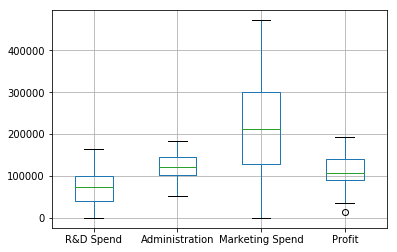

In [4]:
dataset.boxplot()

In [5]:
#Renaming columns
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
dataset.R&D Spend

SyntaxError: invalid syntax (<ipython-input-6-81e0efd78f1e>, line 1)

In [ ]:
dataset.columns = ['rd_spend', 'administration', 'marketing_spend', 'state', 'profit']

In [ ]:
ax = sns.countplot(x='state', data=dataset)
ax.set_xlabel('state')
ax.set_ylabel("count")  

In [ ]:
ax = sns.boxplot(x="state", y="rd_spend", data=dataset)

In [ ]:
ax = sns.boxplot(y="administration", data=dataset)

In [ ]:
ax = sns.boxplot(y="profit", data=dataset)

In [ ]:
ax = sns.boxplot( y="administration", data=dataset)
######################################################

# Bivariate Analysis

In [ ]:
ax = sns.scatterplot(x="rd_spend", y="administration", hue='state', data=dataset)

In [ ]:
ax = sns.scatterplot(x="marketing_spend", y="administration", data=dataset)

# Correlation

In [ ]:
dataset.corr()

# Missing Value Treatement

In [ ]:
##################Missing Value Treatement#############
#1. Deletion
# count the number of NaN values in each column
print(dataset.isnull().sum())

# # # # drop rows with missing values
# dataset.dropna(inplace=True)
# # summarize the number of rows and columns in the dataset
# print(dataset.shape)

In [ ]:
#2. Impute
# fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)
# count the number of NaN values in each column
print(dataset.isnull().sum())
print(dataset.shape)

# Outlier Detection

In [ ]:
#################Outlier Detection ####################
ax = sns.boxplot( y="administration", data=dataset)

In [ ]:
# #OUtlier Imputation for administration column

# q1, q3= np.percentile(dataset['administration'],[25,75])
# q1, q3

# iqr = q3 - q1

# lower_bound = 0
# upper_bound = q3 +(iqr) 

# lower_bound,upper_bound


# # # Replacing outlier in data with the upper bound value

# dataset['administration'] =dataset['administration'].apply(lambda a: upper_bound if (a > upper_bound) else a)

# print(q1, q3)
# print(iqr)
# print(lower_bound,upper_bound)

# Feature Transformations

In [ ]:
dataset.head()

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
dataset['state'] = labelencoder.fit_transform(dataset['state'])

#One hot Encoding
ohe = pd.get_dummies(dataset['state'], prefix='state' , drop_first=False)
ohe.columns
dataset= pd.concat([dataset, ohe], axis=1)
print(dataset.head())

# Scaling

In [ ]:
# scaler = MinMaxScaler()
# scaler_data = scaler.fit_transform(dataset[features])

In [ ]:
# scaler_data

In [ ]:
# scaler_data = pd.DataFrame(scaler_data)
# scaler_data.columns = ['rd_spend', 'administration','marketing_spend']

# dataset.drop('rd_spend', axis=1, inplace=True)
# dataset.drop('administration', axis=1, inplace=True)
# dataset.drop('marketing_spend', axis=1, inplace=True)


# dataset= pd.concat([dataset,scaler_data], axis=1)
# print(dataset.head())

# Set Features \ target

In [ ]:
features = ['rd_spend', 'marketing_spend' ,'state_1','state_2','state_0']
target = ['profit']
X = dataset[features]
y = dataset[target]
print ("features set")

In [ ]:
dataset[features].head()

# Train split data

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print("train test split done")

# Model Building


In [ ]:
#Statsmodels

import statsmodels.api as sm
X_train_temp = sm.add_constant(X_train)
salary_regression = sm.OLS(y_train, X_train_temp).fit()
salary_regression.summary()

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred_lr = regressor.predict(X_test)

print(y_pred_lr)

# Metrics

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)
f
print('R Square value', r2_score(y_test,y_pred_lr))
print('mean absolute error', metrics.mean_absolute_error(y_test,y_pred_lr))
print('mean_squared_error', np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))

# Decision Tree

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# # Fit regression model
# regr_1 = DecisionTreeRegressor(max_depth=2)
# regr_1.fit(X_train, y_train)
# y_pred_tree = regr_1.predict(X_test)
# y_pred_tree

# print('R Square value', r2_score(y_test,y_pred_tree))
# print('mean absolute error', metrics.mean_absolute_error(y_test,y_pred_tree))
# print('mean_squared_error', np.sqrt(metrics.mean_squared_error(y_test,y_pred_tree)))

In [ ]:
# from sklearn import datasets
# from IPython.display import Image  
# from sklearn import tree
# import pydotplus
# import pydot
# from graphviz import Source
# graph = Source( tree.export_graphviz(regr_1, out_file=None, feature_names=X.columns, filled=True))
# png_bytes = graph.pipe(format='png')
# with open('dtree_pipe.png','wb') as f:
#     f.write(png_bytes)

# from IPython.display import Image
# Image(png_bytes)

In [ ]:
# # So let's run the model against the test data
# from sklearn.model_selection import cross_val_predict

# fig, ax = plt.subplots()
# ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# ax.set_title("Ground Truth vs Predicted")
# plt.show()

# Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# regr = RandomForestRegressor(max_depth=2, random_state=0,
#                              n_estimators=100)
# regr.fit(X_train, y_train)
# print(regr.feature_importances_)
# y_pred_rf = (regr.predict(X_test))




# print('R Square value', r2_score(y_test,y_pred_rf))
# print('mean absolute error', metrics.mean_absolute_error(y_test,y_pred_rf))
# print('mean_squared_error', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

# SVM

In [ ]:
# from sklearn.svm import SVR

# regr = SVR(kernel = 'linear', C=1.0)
# regr.fit(X_train, y_train) 

# y_pred = (regr.predict(X_test))

# print('R Square value', r2_score(y_test,y_pred))
# print('mean absolute error', metrics.mean_absolute_error(y_test,y_pred))
# print('mean_squared_error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))